In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [167]:
import pandas as pd
data_raw = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [ ]:
data_raw.head()  # First 5 rows
data_raw.head(10)  # First 10 rows

In [ ]:
data_raw.tail()

In [ ]:
data_raw.shape

In [ ]:
data_raw.info()

In [ ]:
data_raw.describe()

In [ ]:
data_raw.isnull()

In [ ]:
data_raw.isnull().sum()

In [ ]:
print(data_raw['Survived'].value_counts())

In [ ]:
data_raw['Age'].fillna(data_raw['Age'].mean(), inplace=True)

In [ ]:
data_raw.head(10)

In [ ]:
data_raw.tail(10)

In [ ]:
data_raw['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
data_raw.tail(10)

In [ ]:
# Extract first letter (e.g., 'C' from 'C123')
data_raw['Cabin_deck'] = data_raw['Cabin'].str[0]
data_raw['Cabin_deck'].fillna('Unknown', inplace=True)

In [ ]:
data_raw.head()

In [ ]:
print("Missing Values After Imputation:")
print(data_raw[['Age', 'Cabin_deck']].isnull().sum())

In [ ]:
unique_values = data_raw['Cabin_deck'].unique()
print(unique_values)

In [ ]:
value_counts = data_raw['Cabin_deck'].value_counts(dropna=False)  # Include NaN
print(value_counts)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit and transform the 'Cabin_deck' column
data_raw['Cabin_deck_encoded'] = le.fit_transform(data_raw['Cabin_deck'])

# Check mapping (optional)
print("Category to Integer Mapping:")
for i, cat in enumerate(le.classes_):
    print(f"{cat}: {i}")

In [ ]:
data_raw['Cabin_deck_encoded'] = pd.factorize(data_raw['Cabin_deck'])[0]

# Check unique mappings
print(data_raw[['Cabin_deck', 'Cabin_deck_encoded']].drop_duplicates())

In [ ]:
deck_order = {'U': 0, 'T': 1, 'G': 2, 'F': 3, 'E': 4, 'D': 5, 'C': 6, 'B': 7, 'A': 8}
data_raw['Cabin_deck_encoded'] = data_raw['Cabin_deck'].map(deck_order)

In [ ]:
port_map = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
data_raw['Embarked_expanded'] = data_raw['Embarked'].map(port_map)

In [ ]:
data_raw.head()

In [ ]:
data_raw.drop(['Cabin_deck','Embarked'],axis=1,inplace=True)

In [ ]:
data_clean = data_raw.rename(columns={
    'Embarked_expanded': 'Boarding_Port',  # Rename one column
    'Pclass': 'Passenger_Class',
    'PassengerId': 'Passenger_id',
    'SibSp':'Siblings+Spouse',
    'Parch':"Parents_children",# Rename another
    "Cabin_deck_encoded":"Cabin_deck"
})

In [ ]:
data_clean.head()

In [ ]:
data_clean.drop('Cabin',axis=1,inplace=True)

In [ ]:
data_clean.info()

In [ ]:
data_clean.head()

In [ ]:
data_clean['Sex'] = data_clean['Sex'].replace({'Male': 'M', 'Female': 'F'})

In [ ]:
data_clean['Cabin_deck'].isnull().sum()

In [ ]:
data_clean['Sex'] = data_clean['Sex'].str.title().replace({'Male': 'M', 'Female': 'F'})

In [ ]:
data_clean

In [ ]:
data_clean = data_clean.rename(columns={'Parents_children': 'Parents+children'})

In [ ]:
data_clean.info()

In [168]:
data_clean.to_csv('transformed_titanic.csv', index=False)  # Excludes row indices

In [170]:
import os
if os.path.exists('transformed_titanic.csv'):
    loaded_df = pd.read_csv('transformed_titanic.csv')
    print("File loaded successfully!\n", loaded_df.head())
else:
    print("Save failed. Check permissions/path.")

File loaded successfully!
    Passenger_id  Survived  Passenger_Class  \
0             1         0                3   
1             2         1                1   
2             3         1                3   
3             4         1                1   
4             5         0                3   

                                                Name Sex   Age  \
0                            Braund, Mr. Owen Harris   M  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   F  38.0   
2                             Heikkinen, Miss. Laina   F  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   F  35.0   
4                           Allen, Mr. William Henry   M  35.0   

   Siblings+Spouse  Parents+children            Ticket     Fare  Cabin_deck  \
0                1                 0         A/5 21171   7.2500           0   
1                1                 0          PC 17599  71.2833           6   
2                0                 0  STON/O2. 3101282   7.925

In [171]:
import os
print(os.getcwd())  # Shows current directory

/kaggle/working


In [173]:
new_data = pd.read_csv("/kaggle/working/transformed_titanic.csv")

In [174]:
new_data

,Passenger_id,Survived,Passenger_Class,Name,Sex,Age,Siblings+Spouse,Parents+children,Ticket,Fare,Cabin_deck,Boarding_Port
0,1,0,3,"Braund, Mr. Owen Harris",M,22.000000,1,0,A/5 21171,7.2500,0,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.000000,1,0,PC 17599,71.2833,6,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",F,26.000000,0,0,STON/O2. 3101282,7.9250,0,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.000000,1,0,113803,53.1000,6,Southampton
4,5,0,3,"Allen, Mr. William Henry",M,35.000000,0,0,373450,8.0500,0,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.000000,0,0,211536,13.0000,0,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.000000,0,0,112053,30.0000,7,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,29.699118,1,2,W./C. 6607,23.4500,0,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",M,26.000000,0,0,111369,30.0000,6,Cherbourg


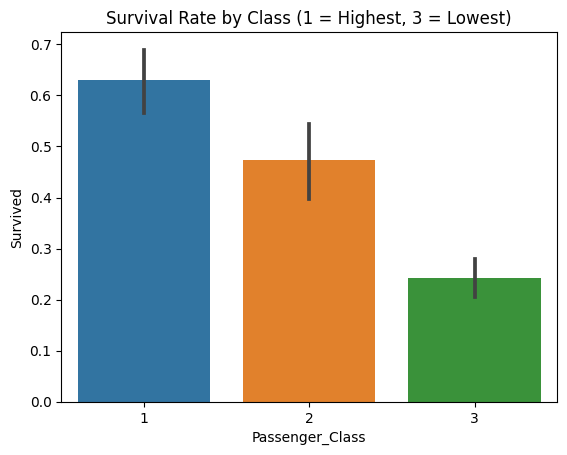

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Passenger_Class', y='Survived', data = new_data)
plt.title("Survival Rate by Class (1 = Highest, 3 = Lowest)");

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


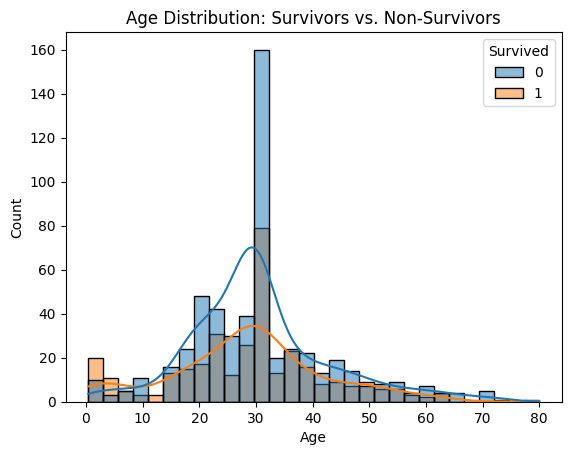

In [178]:
sns.histplot(data=new_data, x='Age', hue='Survived', kde=True, bins=30)
import matplotlib.pyplot as plt
plt.title("Age Distribution: Survivors vs. Non-Survivors");

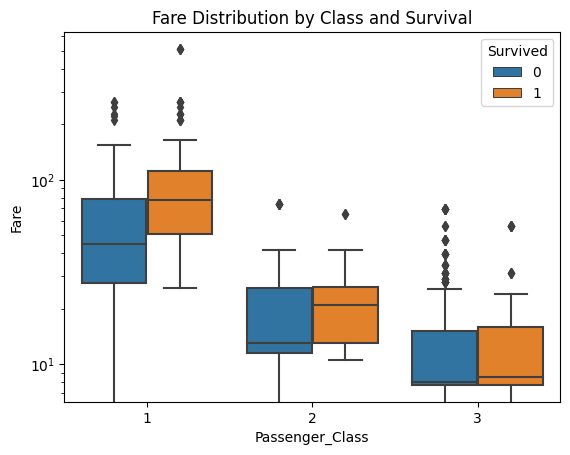

In [179]:
sns.boxplot(x='Passenger_Class', y='Fare', hue='Survived', data=new_data)
plt.yscale('log')  # Handle outliers
plt.title("Fare Distribution by Class and Survival");

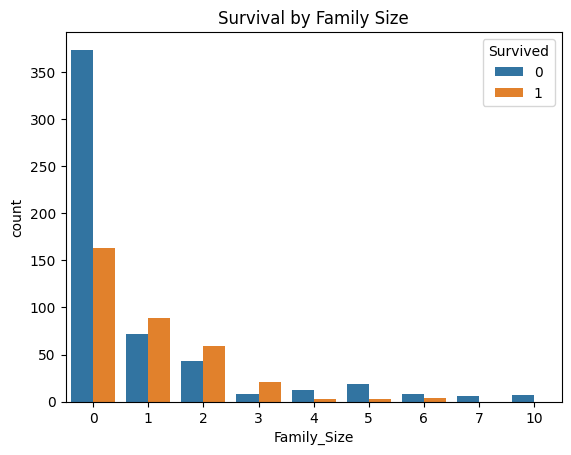

In [180]:
new_data['Family_Size'] = new_data['Siblings+Spouse'] + new_data['Parents+children']
sns.countplot(x='Family_Size', hue='Survived', data=new_data)
plt.title("Survival by Family Size");

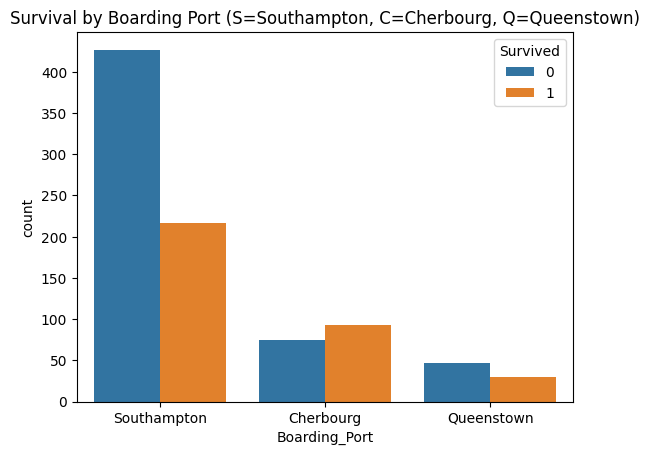

In [181]:
sns.countplot(x='Boarding_Port', hue='Survived', data=new_data)
plt.title("Survival by Boarding Port (S=Southampton, C=Cherbourg, Q=Queenstown)");

The imported dataset related to the Titanic ship has been thoroughly explored using built-in methods, and the characteristics of each field (column) have been examined by verifying their technical attributes. After preprocessing the data, actionable insights were delivered through colorful visualizations generated using Python’s data presentation tools. Thank you!